# Week 3: Classification - Decision Trees (Solution)

This notebook is a brief introduction to **Decision Trees**.

For both methods, we will show two examples. One after using PCA to reduce the dimensionality of the data, and one with just using two features from the original data.

In [3]:
# Load data
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
data = load_iris()
X = data.data # Shape: (150, 4)
y = data.target # Shape: (150,). Note there are three classes: 0, 1, 2
labels = data.feature_names

# PCA
from sklearn.decomposition import PCA

### SOLUTION
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
### SOLUTION

# Two features
X_two_features = X[:, :2]

## Decision Trees using Scikit-Learn

With this code demonstration, we will illustrate how Decision Trees can be implemented using Scikit-Learn. Scikit-Learn's decision tree classifier will be used to build and visualize a simple decision tree model, illustrating its effectiveness for making decisions.

The DecisionTreeClassifier recursively partitions the dataset into subsets based on the values of its input features. By choosing the most appropriate feature to split on at each step, it aims to minimize impurities within subsets. This process continues until a stopping criterion is reached, such as a maximum depth or nodes with pure, unambiguous classes. By following the branches of the tree based on the input features, the resulting tree structure can be used for making predictions.

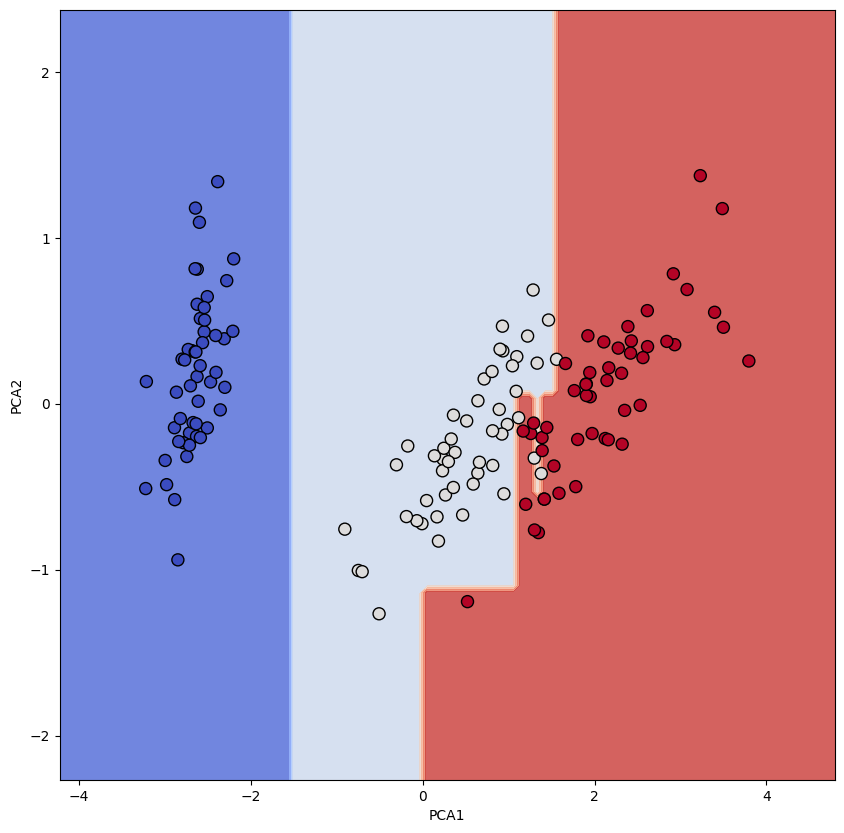

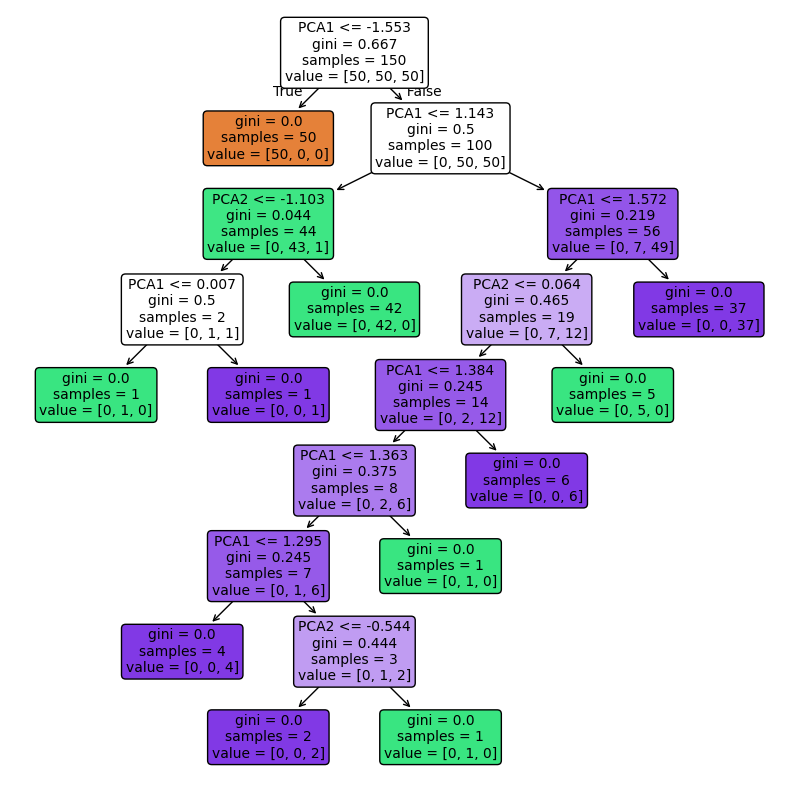

In [4]:
# Decision Tree in sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

# Train Decision Tree

### SOLUTION
dt = DecisionTreeClassifier(random_state=42)
dt.fit(pca_2d, y)
### SOLUTION

fig, ax = plt.subplots(figsize=(10, 10))
display = DecisionBoundaryDisplay.from_estimator(
    dt,
    pca_2d,
    response_method="predict",
    ax=ax,
    alpha=0.8,
    cmap=plt.cm.coolwarm,
    xlabel="PCA1",
    ylabel="PCA2"
)
ax.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y, s=75, cmap=plt.cm.coolwarm, edgecolor="k")
plt.show()

# Plot tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(dt, ax=ax, filled=True, rounded=True, fontsize=10, feature_names=["PCA1", "PCA2"])
plt.show()


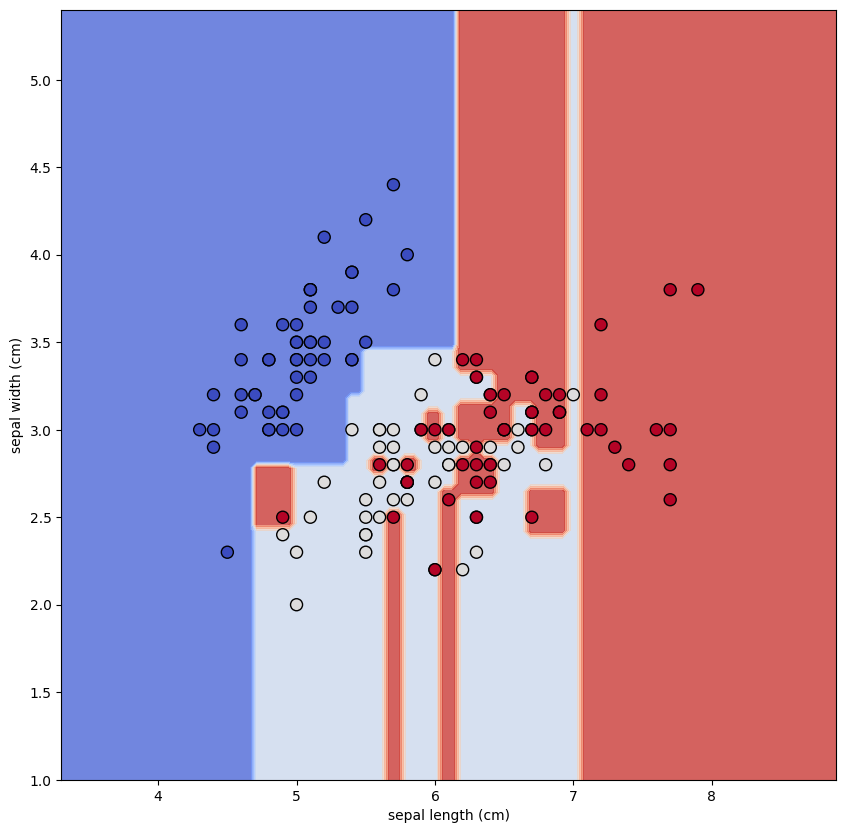

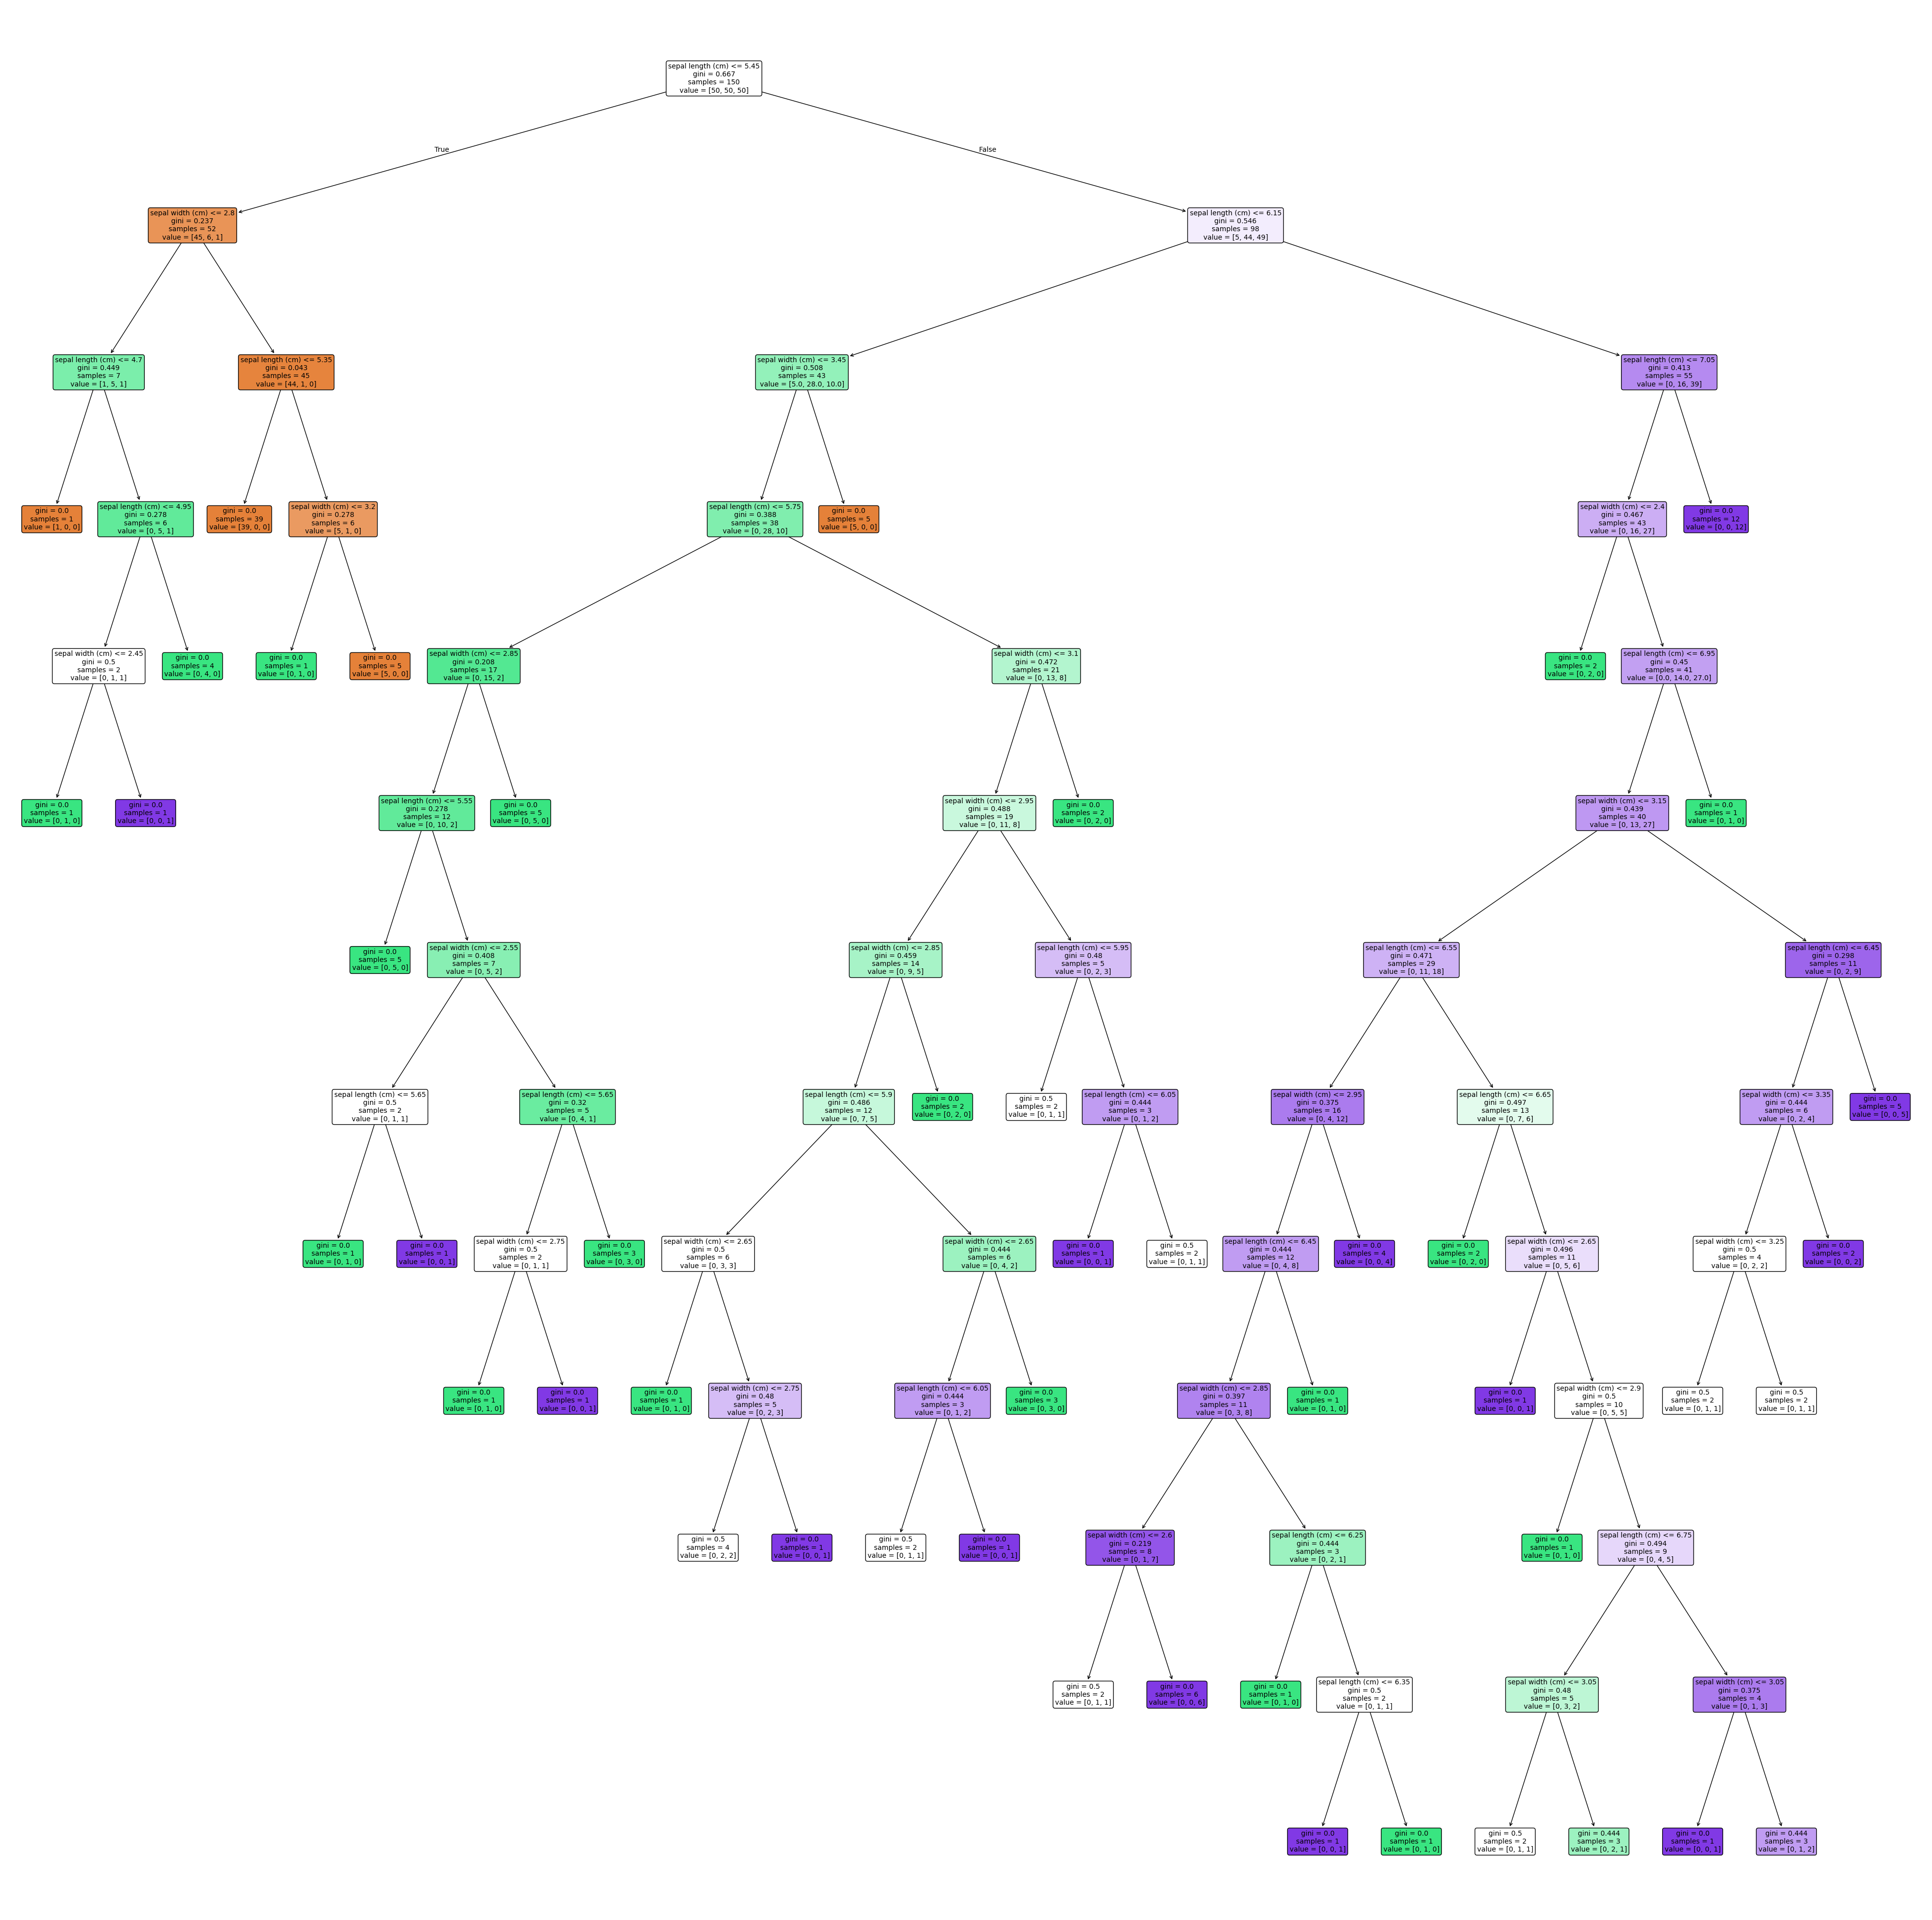

In [5]:
# Decision Tree in sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Tree

### SOLUTION
dt2f = DecisionTreeClassifier(random_state=42)
dt2f.fit(X_two_features, y)
### SOLUTION

fig, ax = plt.subplots(figsize=(10, 10))
display = DecisionBoundaryDisplay.from_estimator(
    dt2f,
    X_two_features,
    response_method="predict",
    ax=ax,
    alpha=0.8,
    cmap=plt.cm.coolwarm,
    xlabel=labels[0],
    ylabel=labels[1]
)
ax.scatter(X_two_features[:, 0], X_two_features[:, 1], c=y, s=75, cmap=plt.cm.coolwarm, edgecolor="k")
plt.show()

# Plot tree
# NOTE - this will produce a big image with very small font. You can zoom in to see the tree.
fig, ax = plt.subplots(figsize=(50, 50))
plot_tree(dt2f, ax=ax, filled=True, rounded=True, fontsize=10, feature_names=[labels[0], labels[1]])
plt.show()
